In [110]:
# !pip3 install seaborn
# !pip3 install cohere
# !pip3 install openai tiktoken

In [17]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [18]:
openai_key = ''
cohere_key = ''

In [19]:
import malaya
import numpy as np
import cohere
import openai
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import seaborn as sns
import tiktoken

2023-08-28 15:37:22.132577: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-28 15:37:22.831382: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Cannot import beam_search_ops from Tensorflow Addons, ['malaya.jawi_rumi.deep_model', 'malaya.phoneme.deep_model', 'malaya.rumi_jawi.deep_model', 'malaya.stem.deep_model'] will not available to use, make sure Tensorflow Addons version >= 0.12.0
check compatible Tensorflow version with Tensorflow Addons at https://github.com/tensorflow/addons/releases
/home/ubuntu/.local/lib/python3.10/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GP

/home/ubuntu/.local/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32
[2023-08-28 15:37:26,087] [INFO] [real_accelerator.py:133:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [20]:
enc = tiktoken.get_encoding("cl100k_base")

In [21]:
openai.api_key = openai_key
co = cohere.Client(cohere_key)

In [22]:
model = malaya.similarity.semantic.huggingface(model = 'mesolitica/finetune-mnli-t5-base-standard-bahasa-cased')

You are using the legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This means that tokens that come after special tokens will not be properly handled. We recommend you to read the related pull request available at https://github.com/huggingface/transformers/pull/24565


In [23]:
_ = model.model.eval()

In [24]:
import json

In [25]:
texts = []
with open('/home/ubuntu/aisyah/hf-datasets/postprocessing/malay-tweets.jsonl') as fopen:
    for l in fopen:
        l = json.loads(l)
        texts.append(l)
        if len(texts) == 300:
            break

In [42]:
(texts[0])

'@skutereletrik @asna_wey @ewanzp @HaHZaff Aku ingtkn tanda 2 kt dahi tu kncing manis'

In [26]:
texts[:5]

['@skutereletrik @asna_wey @ewanzp @HaHZaff Aku ingtkn tanda 2 kt dahi tu kncing manis',
 'Akk aku kecoh giler nk suruh adik dia kawin  https://t.co/DHCxvMfsbS',
 '@rxalkal Itu ava km.ikan cupang',
 '@nubuvi 30 sen gano syat wt tk ingat',
 '@emirgentel Aku dah kahwin anak dh 2 baru tahu sape yang baling ..boleh lah nanti aku cite kt anak aku thks bro']

In [27]:
len(response.embeddings), len(response.embeddings[0])

NameError: name 'response' is not defined

In [28]:
batch_size = 10
outputs = []

for i in tqdm(range(0, len(texts), batch_size)):
    t = texts[i: i + batch_size]
    response = co.embed(
      model='embed-multilingual-v2.0',
      texts=t)
    outputs.append(response)

100%|██████████| 30/30 [00:14<00:00,  2.14it/s]


In [43]:
outputs

[cohere.Embeddings {
 	embeddings: [[0.2788086, 0.48046875, 0.2397461, 0.31225586, -0.030258179, -0.11773682, 0.4243164, -0.3684082, 0.0597229, 0.2746582, 0.015403748, -0.050872803, 0.001748085, 0.1227417, -0.10870361, -0.010505676, 0.24658203, 0.26757812, -0.24951172, -0.046936035, -0.14978027, 0.5078125, 0.13879395, 0.14489746, 0.13549805, -0.07495117, -0.11541748, 0.44702148, -0.15820312, 0.025543213, 0.24841309, -0.3876953, 0.015899658, 0.109191895, -0.32250977, 0.111206055, 0.11254883, 0.022735596, -0.36743164, 0.016342163, 0.0625, 0.40795898, 0.24389648, 0.004501343, 0.1105957, 0.013214111, -0.0357666, 0.37304688, 0.07873535, -0.030166626, -0.2607422, -0.13671875, -0.071899414, 0.44140625, 0.1116333, 0.44580078, 0.06921387, 0.3569336, 0.40527344, 0.2019043, 0.13867188, 0.00020182133, -0.17663574, -0.09259033, 0.35009766, 0.26049805, 0.25732422, 0.38232422, 0.40844727, 0.1652832, -0.01499176, 0.19946289, 0.08605957, 0.26733398, -0.099853516, -0.24645996, 0.33154297, -0.33666992, 0

In [29]:
embeddings = [r.embeddings for r in outputs]
len(embeddings)

30

In [30]:
concat = np.concatenate(embeddings)
concat.shape

(300, 768)

In [31]:
similarity = cosine_similarity(concat)

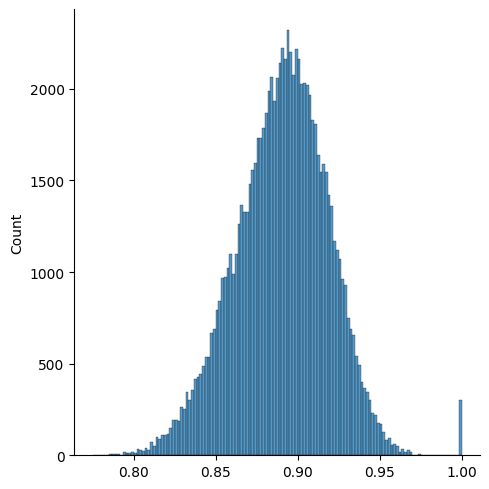

In [102]:
sns.displot(similarity.flatten())

In [32]:
np.where(similarity[0] > 0.95)

(array([  0,  75, 116, 127, 136, 138]),)

In [33]:
texts[0]

'@skutereletrik @asna_wey @ewanzp @HaHZaff Aku ingtkn tanda 2 kt dahi tu kncing manis'

In [34]:
len(enc.encode(texts[0]))

38

In [35]:
def cleaning(text):
    splitted = text.split()
    splitted = [t for t in splitted if t[0] not in {'@'}]
    return ' '.join(splitted)

cleaned_texts = [cleaning(t) for t in texts]

In [36]:
cleaned_texts

['Aku ingtkn tanda 2 kt dahi tu kncing manis',
 'Akk aku kecoh giler nk suruh adik dia kawin https://t.co/DHCxvMfsbS',
 'Itu ava km.ikan cupang',
 '30 sen gano syat wt tk ingat',
 'Aku dah kahwin anak dh 2 baru tahu sape yang baling ..boleh lah nanti aku cite kt anak aku thks bro',
 'Intai2 kat dalam taska.. kesian tengok anak aku duduk kat sudut termenung sorang2 lepas pengasuh letak dia dalam bi https://t.co/R5FifOVmO5',
 'Nep nak parking dekat belah depan. HCO B dekat dengan HCO A. Tapi srs laju datang 10 minit sebelum appointment.',
 'Baik la sayang',
 'hahahahahaha weh bukan selalu tidur lambat sejak wfh ni',
 'RT PDRMsia: POSTING PILIHAN: PEMANDU POTONG BARISAN SECARA BAHAYA DISAMAN Bacaan lanjut di pautan seperti berikut, https://t.co/oDMlPzCHIA',
 'Pasal penghinaan Presiden Dalam RKUHP Sudah tepat #HUT77thRI https://t.co/jiht2Asxc7',
 'itulah tu. Gua Musang tu, dari dulu sampai sekarang mcm tu lah rupanya. ada hati nk jd PM?',
 'Fuhhh ! Perfecto ! Hahahah. Nk wat mcm mana kan. 

In [38]:
len(cleaned_texts)

300

In [39]:
for t in tqdm(cleaned_texts):
    print(t)
    break

  0%|          | 0/300 [00:00<?, ?it/s]

Aku ingtkn tanda 2 kt dahi tu kncing manis


In [146]:
openai_embeddings = []
for t in tqdm(cleaned_texts):
    response = openai.Embedding.create(
        input=t,
        model="text-embedding-ada-002"
    )
    embeddings = response['data'][0]['embedding']
    openai_embeddings.append(embeddings)

100%|██████████| 300/300 [01:47<00:00,  2.80it/s]


In [147]:
# openai_embeddings

In [148]:
openai_embeddings_arr = np.array(openai_embeddings)
openai_embeddings_arr.shape

(300, 1536)

In [149]:
openai_similarity = cosine_similarity(openai_embeddings_arr)

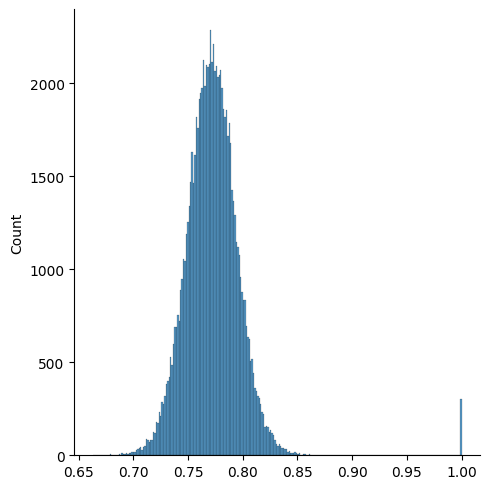

In [150]:
sns.displot(openai_similarity.flatten())

In [160]:
index = 7
print(texts[index])
for i in np.where(openai_similarity[index] >= 0.85)[0][1:]:
    print(texts[i])

@NadyaKamidan Baik la sayang
Lakukan yang terbaik, bertutur kata lah yang lembut, kasih dan sayang lah selayaknya. Aku akan tetap mencintaimu bu https://t.co/JHzXgMaLJF
@Yuni1945 Tinggal di mana kamu sayang


In [144]:
cleaning(texts[0])

'Aku ingtkn tanda 2 kt dahi tu kncing manis'